# Importing libraries

In [1]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import pandas as pd
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# Data Reading and Exploring

In [2]:
df_train = pd.read_csv(r'C:\Users\isa.zeynalov\Desktop\Binary Prediction of Smoker Status\train.csv') 
df_test = pd.read_csv(r'C:\Users\isa.zeynalov\Desktop\Binary Prediction of Smoker Status\test.csv')

In [3]:
df_train

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


In [4]:
df_test

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,265422,40,165,60,78.0,0.8,0.9,1,1,112,...,82,59,149,16.4,1,1.1,24,31,28,0
106167,265423,40,170,85,95.0,1.2,1.2,1,1,130,...,186,44,100,16.0,2,1.0,25,31,38,0
106168,265424,35,170,85,89.0,1.2,1.2,1,1,131,...,76,53,142,15.9,1,0.8,33,32,24,1
106169,265425,40,160,60,67.0,0.7,0.8,1,1,120,...,81,55,103,13.9,1,0.6,42,36,32,0


In [5]:
# Printing information and descriptive statistics for df_train
print("Training Data Information:")
print(df_train.info())
print("\nTraining Data Descriptive Statistics:")
print(df_train.describe().T)

# Printing information and descriptive statistics for df_test
print("\nTesting Data Information:")
print(df_test.info())
print("\nTesting Data Descriptive Statistics:")
print(df_test.describe().T)


Training Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int

In [6]:
df_train_uniques = df_train.apply(pd.unique).to_frame(name="Uniques")
# Concatenate the dataframes side by side

# Display the result
print(df_train_uniques)

                                                               Uniques
id                   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
age                  [55, 70, 20, 35, 30, 50, 45, 40, 60, 25, 65, 7...
height(cm)           [165, 170, 180, 160, 155, 175, 150, 181, 145, ...
weight(kg)           [60, 65, 75, 95, 55, 70, 50, 45, 90, 80, 85, 1...
waist(cm)            [81.0, 89.0, 105.0, 80.5, 51.0, 69.0, 84.5, 73...
eyesight(left)       [0.5, 0.6, 0.4, 1.5, 1.2, 0.7, 0.8, 1.0, 2.0, ...
eyesight(right)      [0.6, 0.7, 0.5, 1.2, 1.0, 0.9, 1.5, 0.8, 0.3, ...
hearing(left)                                                   [1, 2]
hearing(right)                                                  [1, 2]
systolic             [135, 146, 118, 131, 121, 150, 137, 130, 105, ...
relaxation           [87, 83, 75, 88, 76, 95, 91, 80, 70, 60, 73, 6...
fasting blood sugar  [94, 147, 79, 91, 101, 84, 100, 104, 64, 71, 8...
Cholesterol          [172, 194, 178, 180, 155, 199, 222, 282, 243, ...
trigly

In [7]:
df_test_uniques = df_test.apply(pd.unique).to_frame(name="Uniques")
# Concatenate the dataframes side by side

# Display the result
print(df_test_uniques)

                                                               Uniques
id                   [159256, 159257, 159258, 159259, 159260, 15926...
age                  [40, 80, 60, 55, 70, 45, 30, 25, 50, 35, 20, 7...
height(cm)           [165, 160, 170, 150, 145, 175, 155, 185, 180, ...
weight(kg)           [70, 60, 50, 75, 55, 80, 65, 45, 85, 90, 95, 1...
waist(cm)            [84.0, 93.0, 86.5, 67.0, 89.4, 75.8, 87.0, 69....
eyesight(left)       [1.2, 1.0, 0.6, 0.3, 1.5, 0.5, 0.9, 0.8, 0.7, ...
eyesight(right)      [1.2, 1.0, 0.7, 0.4, 0.9, 1.5, 0.5, 0.3, 0.8, ...
hearing(left)                                                   [1, 2]
hearing(right)                                                  [1, 2]
systolic             [130, 144, 117, 116, 132, 94, 128, 152, 150, 1...
relaxation           [89, 72, 75, 62, 94, 52, 91, 90, 85, 64, 70, 6...
fasting blood sugar  [107, 93, 92, 91, 79, 104, 106, 120, 105, 102,...
Cholesterol          [200, 172, 161, 213, 170, 179, 225, 177, 193, ...
trigly

In [8]:
df_train.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [9]:
df_test.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
dtype: int64

In [10]:
# Extract the ID column from the test dataset
ids = df_test['id']

# Data Visualization

**Histogram of Age Distribution:**

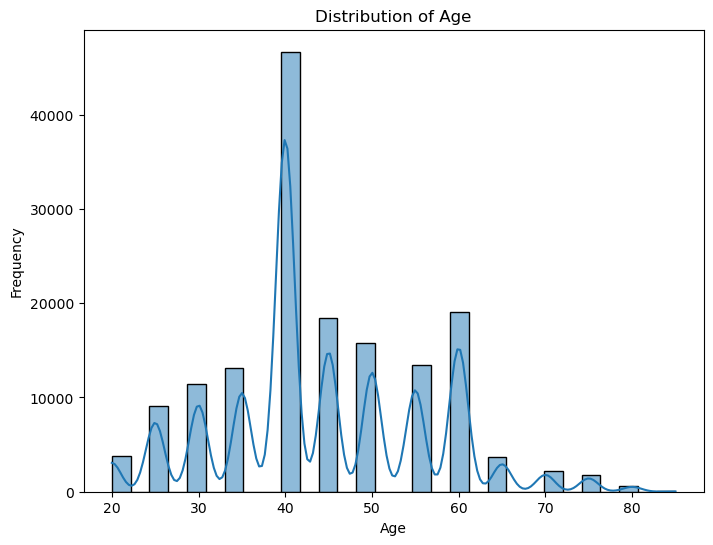

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df_train['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Plot pairwise relationships between different numerical features in your dataset**

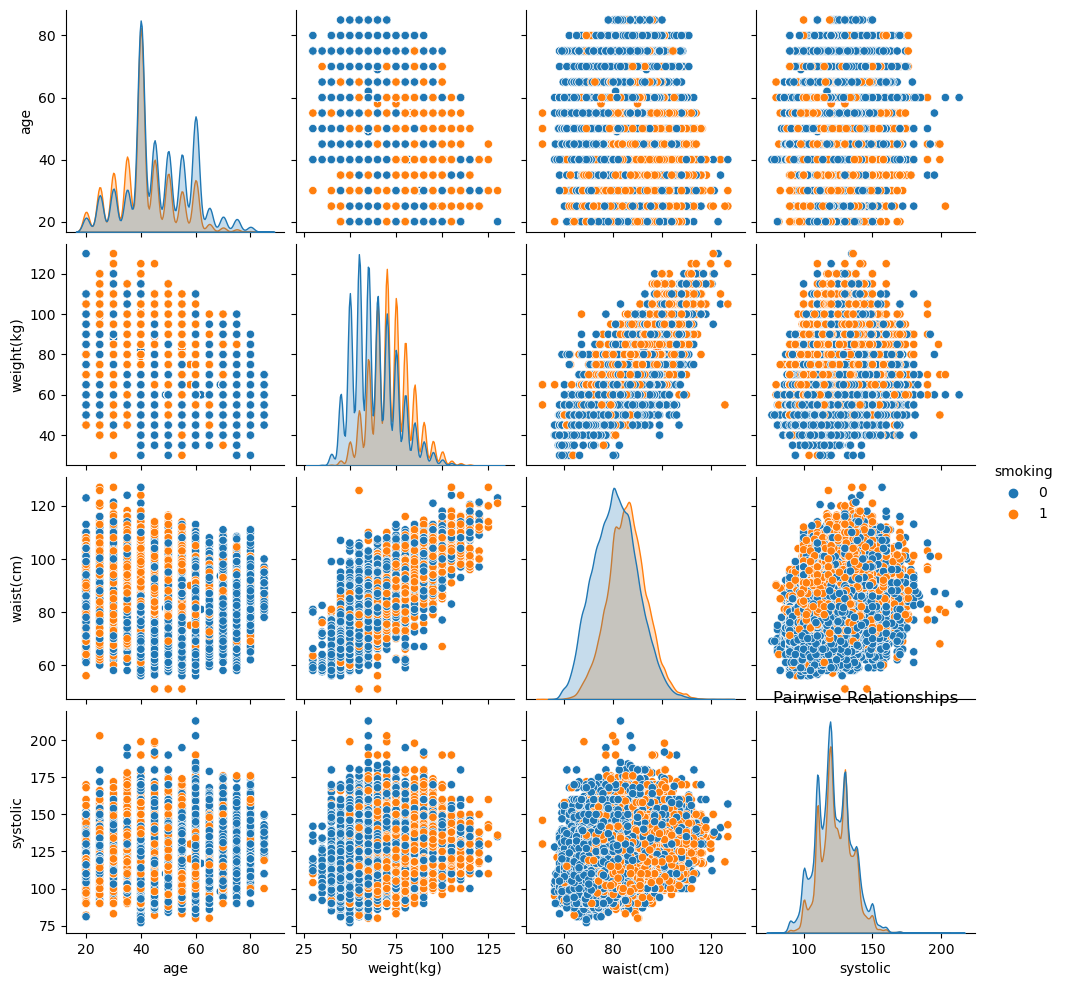

In [12]:
sns.pairplot(df_train[['age', 'weight(kg)', 'waist(cm)', 'systolic', 'smoking']], hue='smoking')
plt.title('Pairwise Relationships')
plt.show()

**Boxplot of Blood Pressure by Smoking Status:**

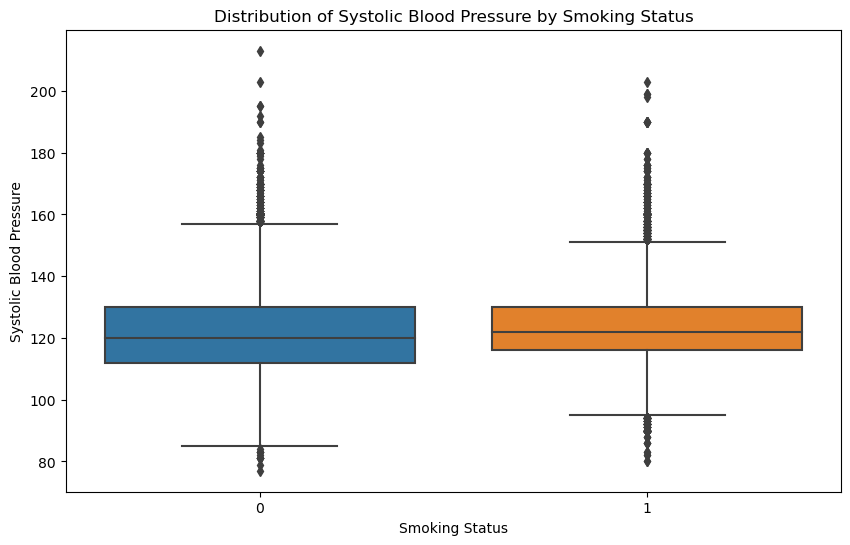

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking', y='systolic', data=df_train)
plt.title('Distribution of Systolic Blood Pressure by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Systolic Blood Pressure')
plt.show()

**Barplot of Mean Cholesterol Level by Age Group**

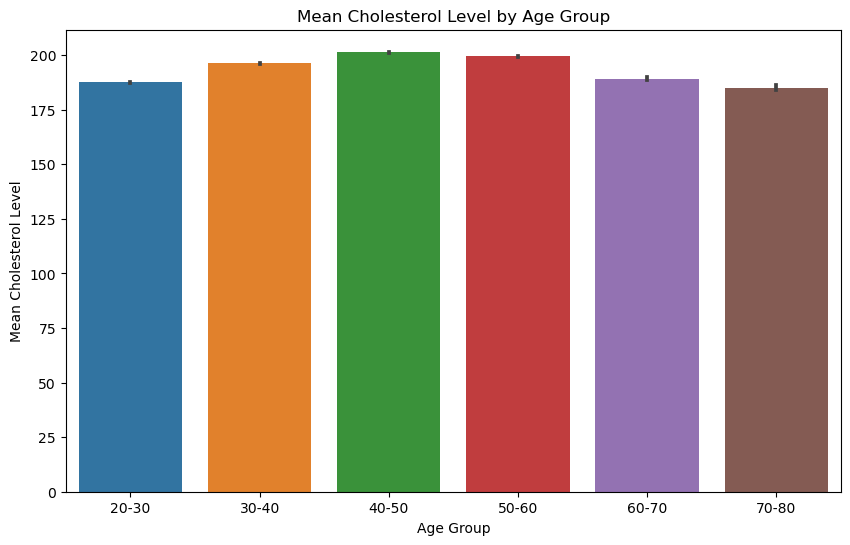

In [14]:
df_train['age_group'] = pd.cut(df_train['age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='Cholesterol', data=df_train)
plt.title('Mean Cholesterol Level by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Cholesterol Level')
plt.show()

**Countplot of Smoking Status**

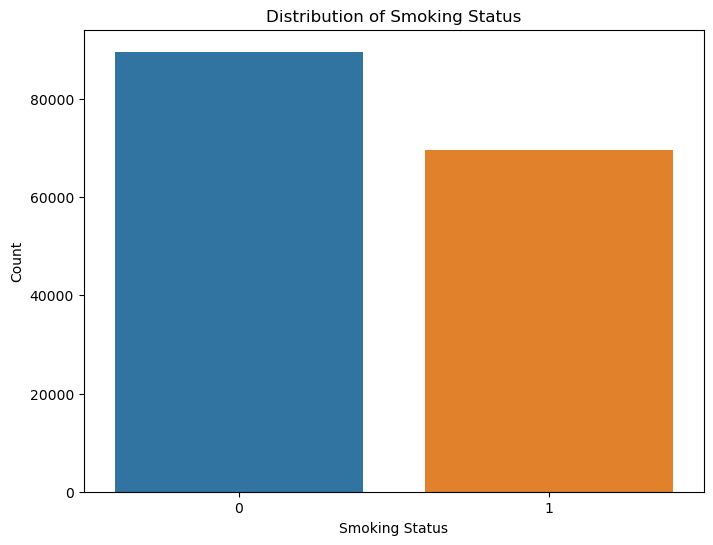

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking', data=df_train)
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

**Plot a pie chart to visualize the distribution of 'smoking' status**

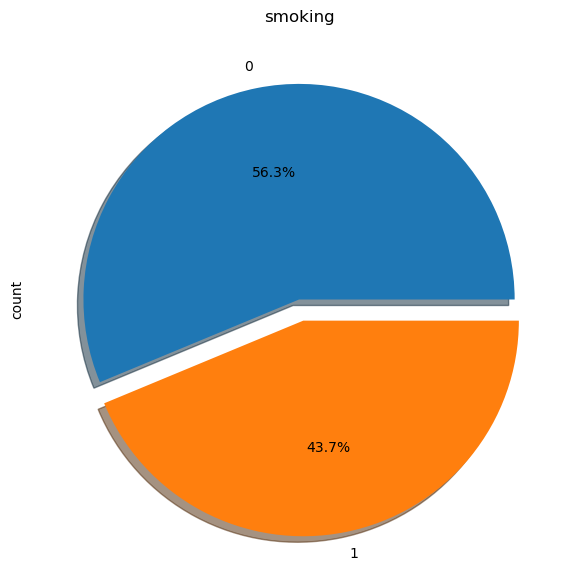

In [16]:
fig, ax = plt.subplots(figsize=(7, 7))
df_train['smoking'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True)
ax.set_title('smoking')
plt.show()

# Machine Learning

In [17]:
# Drop the 'age_group' column
df_train.drop('age_group', axis=1, inplace=True)

In [18]:
# Split the data into features (X) and target variable (y)
X = df_train.drop(columns=['smoking'])
y = df_train['smoking']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Define the preprocessing steps
preprocessor = Pipeline([
    ('scaler', MinMaxScaler())  # Scale features between 0 and 1
])

# Define the models
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42))
]


Model: Random Forest
Accuracy: 0.7705010674368956
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.79     17783
           1       0.72      0.80      0.75     14069

    accuracy                           0.77     31852
   macro avg       0.77      0.77      0.77     31852
weighted avg       0.78      0.77      0.77     31852



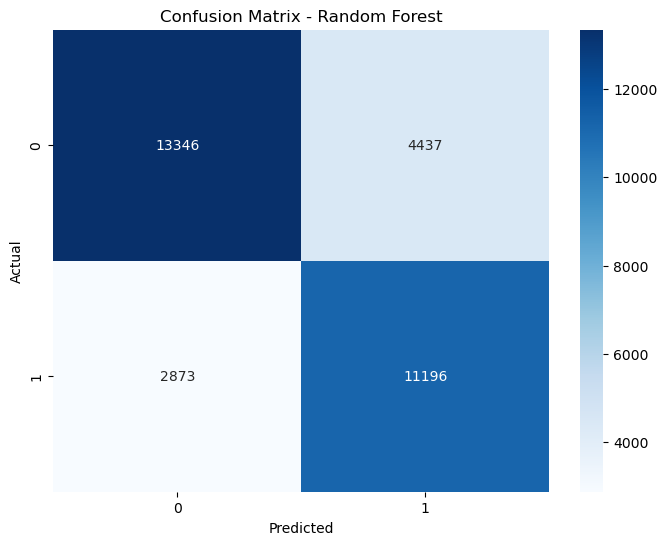

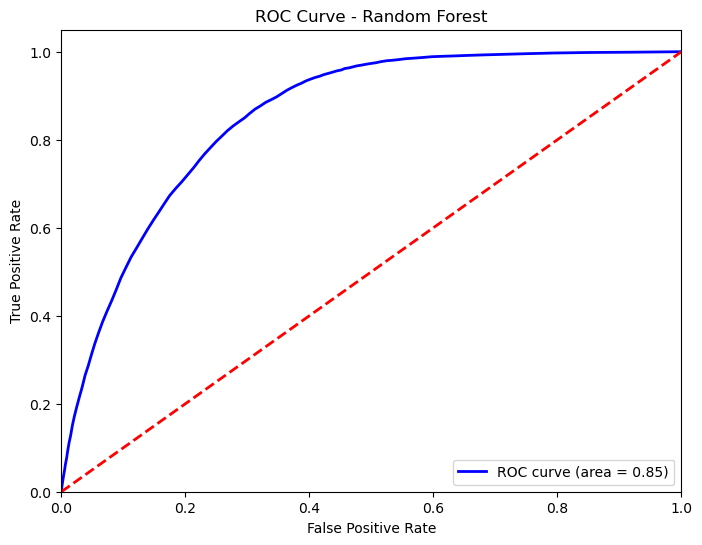

Model: XGBoost
Accuracy: 0.7803905563229938
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79     17783
           1       0.73      0.80      0.76     14069

    accuracy                           0.78     31852
   macro avg       0.78      0.78      0.78     31852
weighted avg       0.79      0.78      0.78     31852



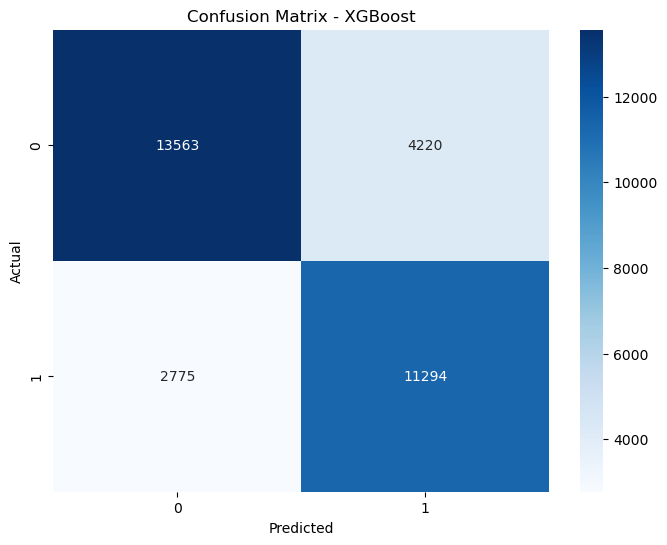

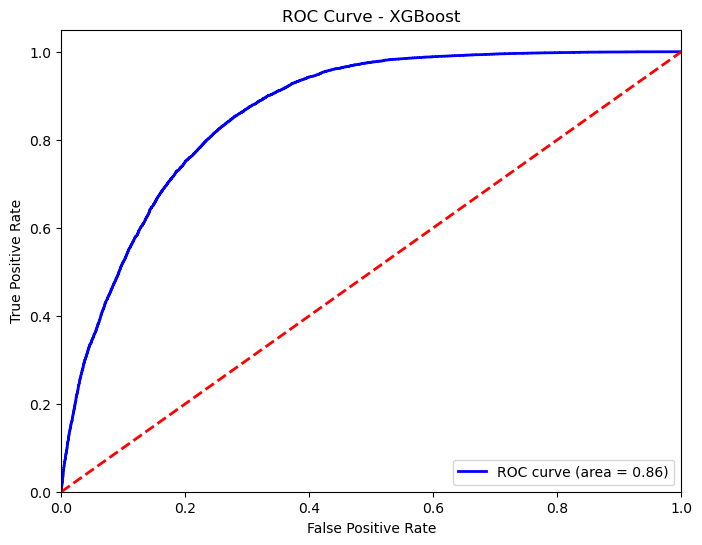

[LightGBM] [Info] Number of positive: 55584, number of negative: 71820
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2384
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.436281 -> initscore=-0.256268
[LightGBM] [Info] Start training from score -0.256268
Model: LightGBM
Accuracy: 0.7791347482104735
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79     17783
           1       0.72      0.81      0.76     14069

    accuracy                           0.78     31852
   macro avg       0.78      0.78      0.78     31852
weighted avg       0.78      0.78      0.78     31852



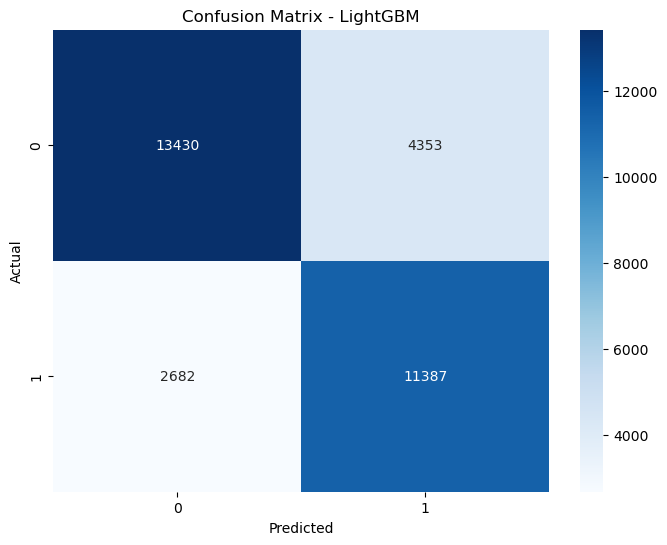

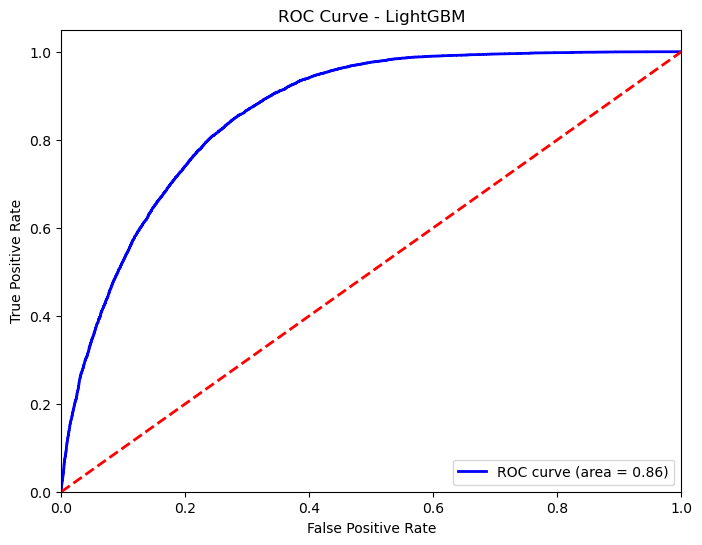

In [21]:
# Train and evaluate models
for name, model in models:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()

In [22]:
# Make predictions on the test dataset
predictions = pipeline.predict(df_test)

# Create a DataFrame for submission
submission_df = pd.DataFrame({'id': ids, 'smoking': predictions})

# Save the submission file
submission_df.to_csv('submission.csv', index=False)

# Summary

The project aimed to develop a machine learning model for predicting smoking status based on various health-related features. The dataset included information such as age, weight, blood pressure, and cholesterol levels. The goal was to build a model that could accurately classify individuals as smokers or non-smokers.

Initially, I explored the dataset to understand its structure and characteristics. This involved examining data distributions, identifying missing values, and visualizing relationships between different features and the target variable (smoking status).

After data preprocessing, which included handling missing values and scaling features, I proceeded to train multiple machine learning models. These models, including Random Forest, XGBoost, and LightGBM classifiers, underwent thorough evaluation using metrics like accuracy, precision, recall, and F1-score to assess their predictive performance.

Finally, the project concluded with making predictions on a separate test dataset and generating a submission file for a Kaggle competition. This comprehensive approach showcased my proficiency in data preprocessing, model training, evaluation, and submission preparation, demonstrating my ability to tackle real-world classification problems using machine learning techniques.

# Thanks for watching my notebook!!!